In [32]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split

import seaborn as sns

## Importing DataSet

In [22]:
DataSet = tf.keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = DataSet.load_data()


## Display Sample Images 

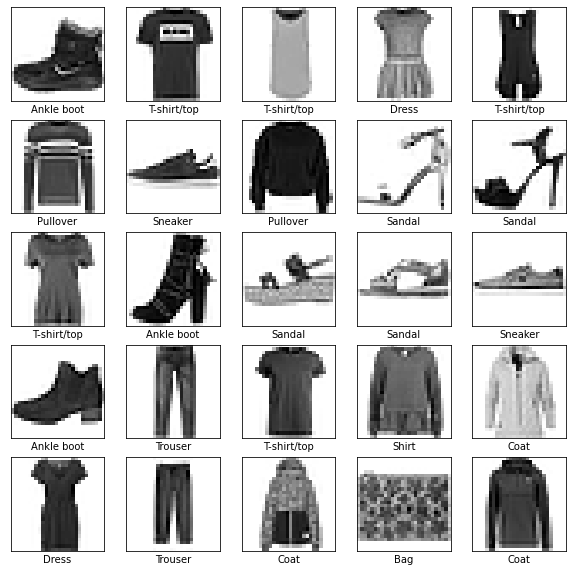

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

## Trainset and Testset Size

In [24]:
print("The Number of Images in train set is : {}".format(X_train.shape))
print("The Number of Images in test set is : {}".format(X_test.shape))


The Number of Images in train set is : (60000, 28, 28)
The Number of Images in test set is : (10000, 28, 28)


## Showing the Count in each Category

### Train set

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

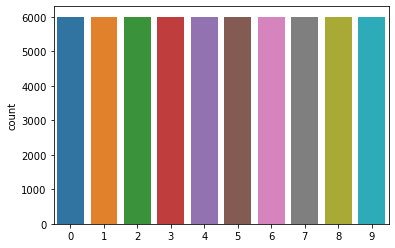

In [25]:
sns.countplot(Y_train)

### Test Set

G:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

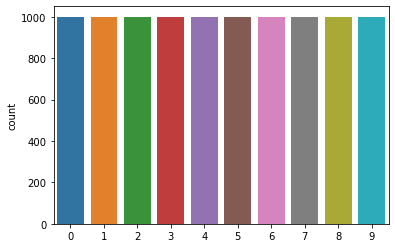

In [26]:
sns.countplot(Y_test)

## Preprocessing

In [29]:
#Normalize function makes all pixel values between[0,1] by dividing all pixels on 255
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)


## Showing Images After Preprocessing

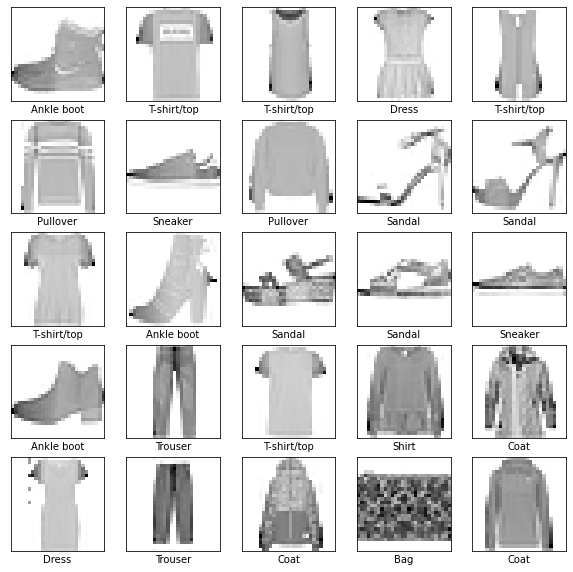

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

## Splitting The Trainning Data into(Training,Validation)


In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=28)

## Buliding The Model

In [37]:
model=tf.keras.Sequential([
    #Input Layer
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #1st Hidden layer
    tf.keras.layers.Dense(256,activation='relu'),
    #2nd Hidden Layer
    tf.keras.layers.Dense(128,activation='relu'),
    #3rd Hidden Layer
    tf.keras.layers.Dense(64,activation='relu'),
    #Output layer
    tf.keras.layers.Dense(10,activation='softmax')
])
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=30, batch_size=32)


Epoch 1/30
1500/1500 [==============================] - 18s 11ms/step - loss: 0.5021 - accuracy: 0.8155 - val_loss: 0.4447 - val_accuracy: 0.8314
Epoch 2/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3686 - accuracy: 0.8634 - val_loss: 0.4056 - val_accuracy: 0.8496
Epoch 3/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3247 - accuracy: 0.8799 - val_loss: 0.3391 - val_accuracy: 0.8773
Epoch 4/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2985 - accuracy: 0.8891 - val_loss: 0.3580 - val_accuracy: 0.8687
Epoch 5/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2796 - accuracy: 0.8953 - val_loss: 0.3352 - val_accuracy: 0.8784
Epoch 6/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2620 - accuracy: 0.9016 - val_loss: 0.3209 - val_accuracy: 0.8806
Epoch 7/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2488 - accuracy: 0.9067 - val_loss: 0.3354 - 

## Evaluating The Model

In [38]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 9ms/step - loss: 0.4715 - accuracy: 0.8837


[0.47150570154190063, 0.8837000131607056]

## Tunning The Hyper Parameters Using Keras_Tuner

In [44]:
def build_model(hyper_parameters):               
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    #providing the range for hidden layers  
    for i in range(hyper_parameters.Int('num_of_layers',3,20)):         
        #providing range for number of neurons in hidden layers
        model.add(tf.keras.layers.Dense(units=hyper_parameters.Int('num_of_neurons'+ str(i),min_value=32,max_value=512,step=32),
                                    activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hyper_parameters.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4,1e-5])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model


In [45]:
#feeding the model and parameters to Random Search
tuner=RandomSearch(build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Selected_1_Project',
    project_name='Classification_ANN_Clothes_Images')

In [47]:
#tells us how many hyperparameters we are tuning
#in our case it's 3 =layers,neurons,learning rate
tuner.search_space_summary()
#fitting the tuner
tuner.search(X_train,Y_train,epochs=30,validation_data=(X_val,Y_val))

Trial 5 Complete [00h 45m 39s]
val_accuracy: 0.8712222377459208

Best val_accuracy So Far: 0.8910555442174276
Total elapsed time: 02h 51m 27s
INFO:tensorflow:Oracle triggered exit


## Getting Best Results

In [56]:
tuner.results_summary()

Results summary
Results in Selected_1_Project\Classification_ANN_Clothes_Images
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_layers: 5
num_of_neurons0: 384
num_of_neurons1: 448
num_of_neurons2: 96
learning_rate: 0.0001
num_of_neurons3: 384
num_of_neurons4: 128
num_of_neurons5: 192
num_of_neurons6: 192
num_of_neurons7: 192
num_of_neurons8: 64
num_of_neurons9: 352
num_of_neurons10: 352
Score: 0.8910555442174276
Trial summary
Hyperparameters:
num_of_layers: 5
num_of_neurons0: 32
num_of_neurons1: 352
num_of_neurons2: 160
learning_rate: 0.0001
num_of_neurons3: 384
num_of_neurons4: 128
num_of_neurons5: 160
num_of_neurons6: 448
num_of_neurons7: 448
num_of_neurons8: 384
num_of_neurons9: 256
num_of_neurons10: 32
Score: 0.8805833260218302
Trial summary
Hyperparameters:
num_of_layers: 7
num_of_neurons0: 384
num_of_neurons1: 352
num_of_neurons2: 512
learning_rate: 1e-05
num_of_neurons3: 64
num_of_neurons4: 416
num_of_neurons5: 192
num

## Construct a new model with the best HyperParameters

In [66]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
 
     tf.keras.layers.Dense(384,activation='relu'),
         tf.keras.layers.Dense(384,activation='relu'),
         tf.keras.layers.Dense(384,activation='relu'),
 tf.keras.layers.Dense(384,activation='relu'),


    
    tf.keras.layers.Dense(10,activation='softmax')
])


In [98]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model2.fit(X_train, Y_train, batch_size=32,
                              validation_data=(X_val, Y_val), 
                              epochs=30)

Epoch 1/30
1500/1500 [==============================] - 34s 20ms/step - loss: 0.0197 - accuracy: 0.9930 - val_loss: 0.7741 - val_accuracy: 0.8906
Epoch 2/30
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.8077 - val_accuracy: 0.8878
Epoch 3/30
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.8024 - val_accuracy: 0.8893
Epoch 4/30
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.8080 - val_accuracy: 0.8827
Epoch 5/30
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.7367 - val_accuracy: 0.8923
Epoch 6/30
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0101 - accuracy: 0.9963 - val_loss: 0.8827 - val_accuracy: 0.8862
Epoch 7/30
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.7840 -

## Evaluating Model on Test Set

In [99]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - ETA: 0s - loss: 0.8364 - accuracy: 0.8887 ETA: 2s - loss: 0.872 - 14s 11ms/step - loss: 0.8384 - accuracy: 0.8882


[0.8383777141571045, 0.8881999850273132]

## Get A Set of All Predictions

In [100]:
predictions = model2.predict(X_test)

In [101]:
pred = np.argmax(predictions, axis=1)
print(pred[:10])
print(Y_test[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


## Visualizing The Output

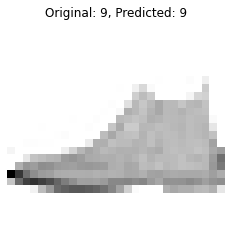

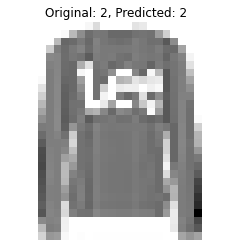

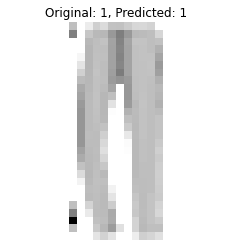

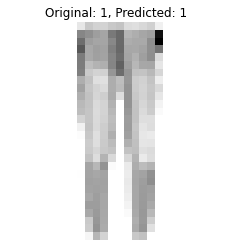

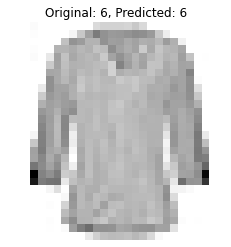

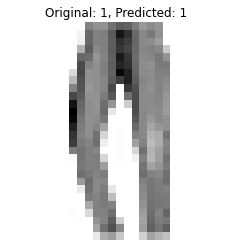

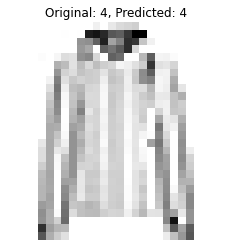

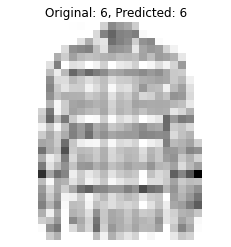

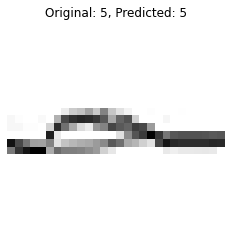

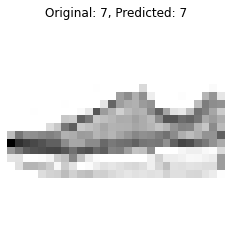

<Figure size 432x288 with 0 Axes>

In [102]:
for i in range(10):
  plt.imshow(X_test[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(Y_test[i], pred[i]))
  plt.axis("Off")
  plt.figure()

## Confusion Matrix

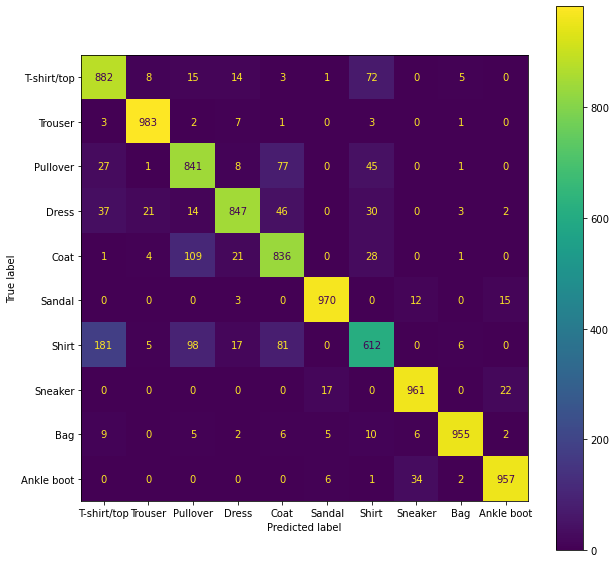

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred)
accuracy_score(Y_test,pred)
import seaborn as sns
dis = ConfusionMatrixDisplay(cm, display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
dis.plot(ax=ax)

## Loss Curve

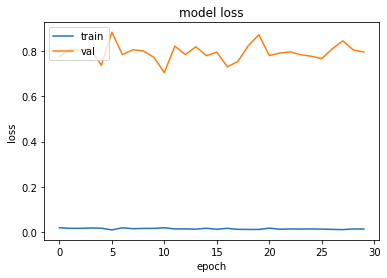

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [110]:
from sklearn.preprocessing import label_binarize
Y_test = label_binarize(Y_test, classes=[0,1,2,3,4,5,6,7,8,9])
pred = label_binarize(pred, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

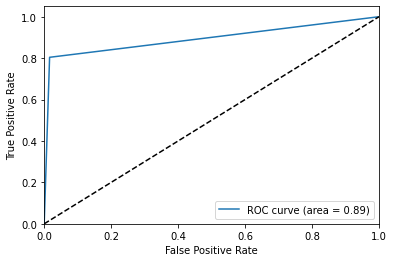

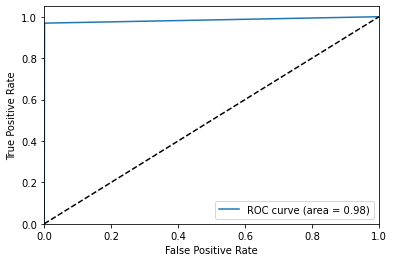

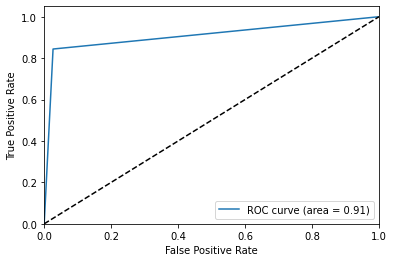

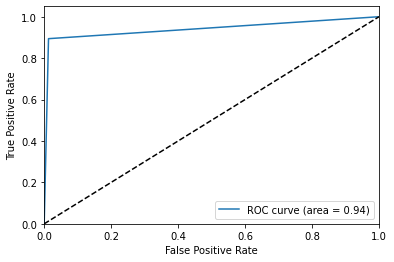

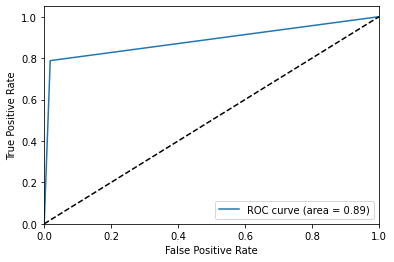

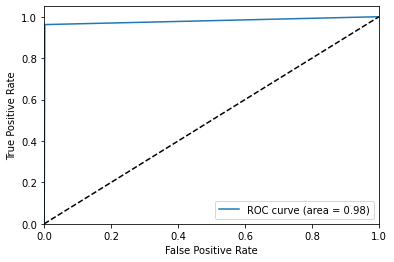

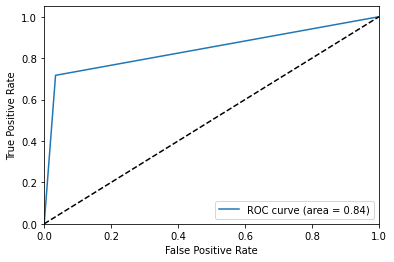

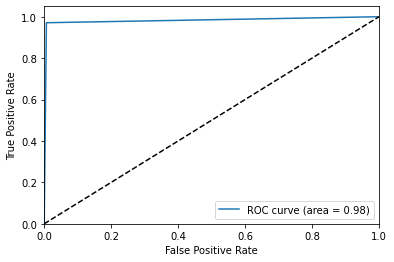

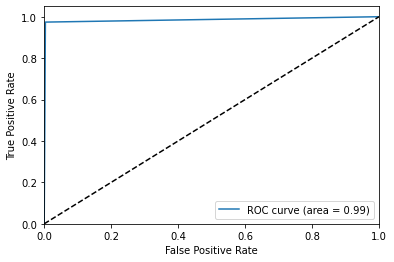

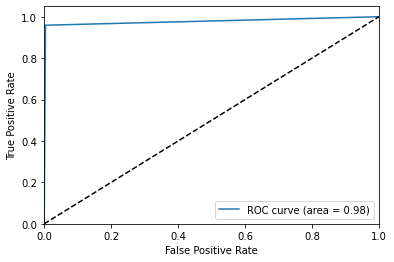

In [112]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
   
    plt.legend(loc="lower right")
    plt.show()